## Introduction to the Project

### Information on Kaggle
Link: https://www.kaggle.com/datasets/mattop/video-games-released-in-2022
# EDA on Games Dataset
## Introduction

Welcome to the project that focuses on performing exploratory data analysis (EDA) on a games dataset. This project provides an in-depth understanding of the data, uncovering patterns, and exploring relationships between variables.

## Contents and Main Idea

This project aims to provide a comprehensive analysis of the games dataset and uncover insights into the popularity and success of different types of games, their genres, and platforms. The dataset consists of various variables such as game name, genre, platform, year of release, and others. The main idea of this project is to understand the trends and patterns in the gaming industry and to uncover the factors that contribute to the success of a game.

## Learning Objectives

This project offers several learning objectives for those interested in exploring data analysis and visualization. The following are some of the key learning objectives of this project:

1. Develop a comprehensive understanding of the games dataset
2. Practice data cleaning and preprocessing techniques
3. Explore patterns and relationships between variables using data visualization techniques
4. Uncover insights into the popularity and success of different types of games, their genres, and platforms
5. Learn to interpret the results of EDA and draw conclusions based on the data

## Contribution

This project is open-source and welcomes contributions from anyone who wants to enhance their skills and contribute to the project. Some ways to contribute include:

1. Improving data visualization techniques
2. Adding more variables to the analysis
3. Providing more in-depth insights into the results of EDA
4. Offering suggestions for future improvements to the project

If you are interested in contributing to this project, please reach out and we would be happy to provide more details.

In [1]:
# Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set some seaborn settings
sns.set_style("white")

# Define the colors for the plots
colors = ["salmon", "lightblue"]

In [51]:
# Load the data via GITHUB raw file link
data_link = "https://raw.githubusercontent.com/muhammadanas0716/Machine-Learning-101/main/Projects/(EDA)%20Video%20Games%20Released%20in%202022/video-games-2022.csv"
df_games = pd.read_csv(data_link)

## Basic information about our dataset
1. First & last 5 rows of the dataset
2. Data size and data types
3. Descriptive statistics


### 1. First & last 5 rows of the dataset

In [21]:
df_games.head()

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s)
0,JANUARY,3,Freddi Fish 3: The Case of the Stolen Conch Shell,NS,Adventure,Humongous Entertainment,UFO Interactive Games
1,JANUARY,3,Putt-Putt Travels Through Time,NS,Adventure,Humongous Entertainment,UFO Interactive Games
2,JANUARY,4,Deep Rock Galactic,"PS4, PS5",First-person shooter,Ghost Ship Games,Coffee Stain Publishing
3,JANUARY,4,The Pedestrian,"XBO, XSX","Puzzle, platform",Skookum Arts LLC,Skookum Arts LLC
4,JANUARY,6,Demon Gaze Extra,"NS, PS4",Role-playing,Cattle Call,Clouded Leopard Entertainment


In [22]:
df_games.tail()

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s)
982,DECEMBER,22,Uta no Prince-sama All Star After Secret,NS,Visual novel,Nippon Ichi Software,Broccoli
983,DECEMBER,22,Valkyrie Profile: Lenneth,"PS4, PS5",Role-playing,tri-Ace,Square Enix
984,DECEMBER,22,Naraka: Bladepoint,XBO,"Action-adventure, battle royale",Thunder Fire Universe X Studio,NetEase Games
985,DECEMBER,23,Sports Story,NS,"Adventure, sports",Sidebar Games,Sidebar Games
986,DECEMBER,28,Hyper Gunsport,"PS4, PS5",Action,Necrosoft Games,Necrosoft Games


### 2. Data size and data types

In [23]:
# Shape of the dataset
df_games.shape

(987, 7)

Means that there are 987 rows (instances) and 7 columns (features/predicators)

In [25]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Month         987 non-null    object
 1   Day           987 non-null    int64 
 2   Title         987 non-null    object
 3   Platform(s)   987 non-null    object
 4   Genre(s)      987 non-null    object
 5   Developer(s)  987 non-null    object
 6   Publisher(s)  987 non-null    object
dtypes: int64(1), object(6)
memory usage: 54.1+ KB


This shows us the following:
1. No Null/Missing values
2. Only one ***integer*** column, else are ***objects/strings***
3. Memory usage is about 54 KB. Not important as the data is small, but could be useful for large datasets, where data does not fit into the memory.

### 3. Descriptive statistics

In [24]:
df_games.describe()

,Day
count,987.000000
mean,16.599797
std,8.814457
min,1.000000
25%,10.000000
50%,17.000000
75%,24.000000
max,31.000000


The only numerical column is the ***day*** column.

The statistics show us that the games tend to be released in the second part of the month (median 17, where the month lasts 31 days max).

# Initial data visualization

## 1. Most popular month for releasing a game

In [11]:
df_games['Month'].value_counts().head(1)

JUNE    127
Name: Month, dtype: int64

June was the month with the most releases - 127.

Let's see how does it compare with other months.

## 2. The distribution of game releases per month

### a) Ordered by the cardinality

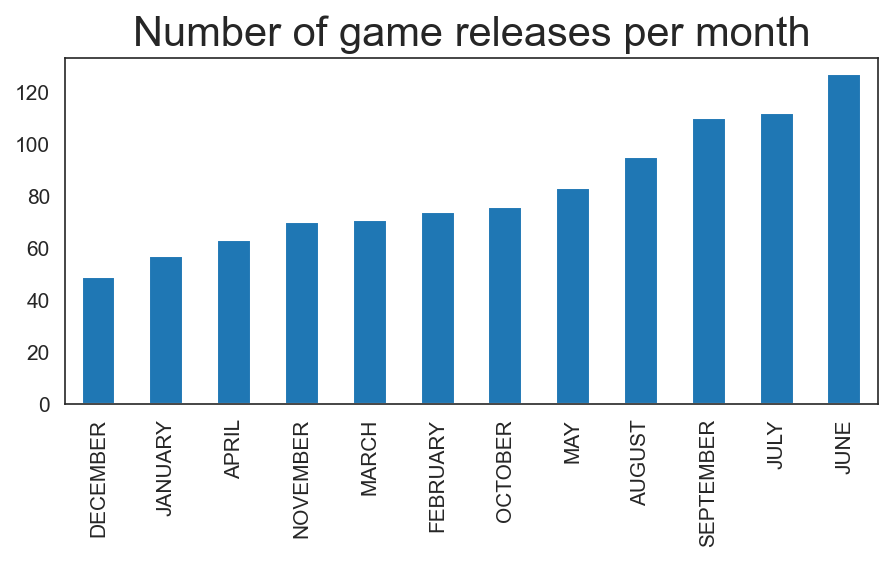

In [45]:
plt.figure(figsize=(7, 3), dpi=150)
df_games["Month"].value_counts(ascending=True).plot.bar()
plt.title("Number of game releases per month", size=20)
plt.show()


### b) Ordered chronologically

To order the data chronologically, we need to define the order and then use `reindex` method.

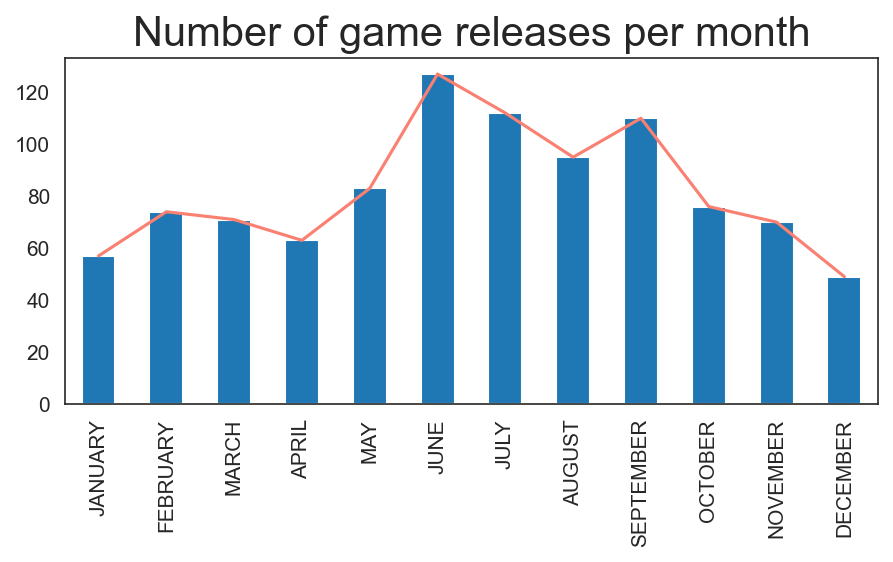

In [171]:
# First we need to define the order (it is already ordered in the initial data, but we need to save it)
months = list(df_games["Month"].unique())

plt.figure(figsize=(7, 3), dpi=150)
df_games["Month"].value_counts().reindex(months).plot.bar()
df_games["Month"].value_counts().reindex(months).plot(color=colors[0])
plt.title("Number of game releases per month", size=20)
plt.xticks(rotation=90)
plt.show()

The figures tell us an interesting thing - there are more game releases during Summer holiday period.

This could be due to several aspects, e.g. more game conferences, target audience (mostly teenagers) having more time to play, etc.

More data would be needed to verify the correctness of these hypotheses.

## 3. Most popular days of the month for the game release.

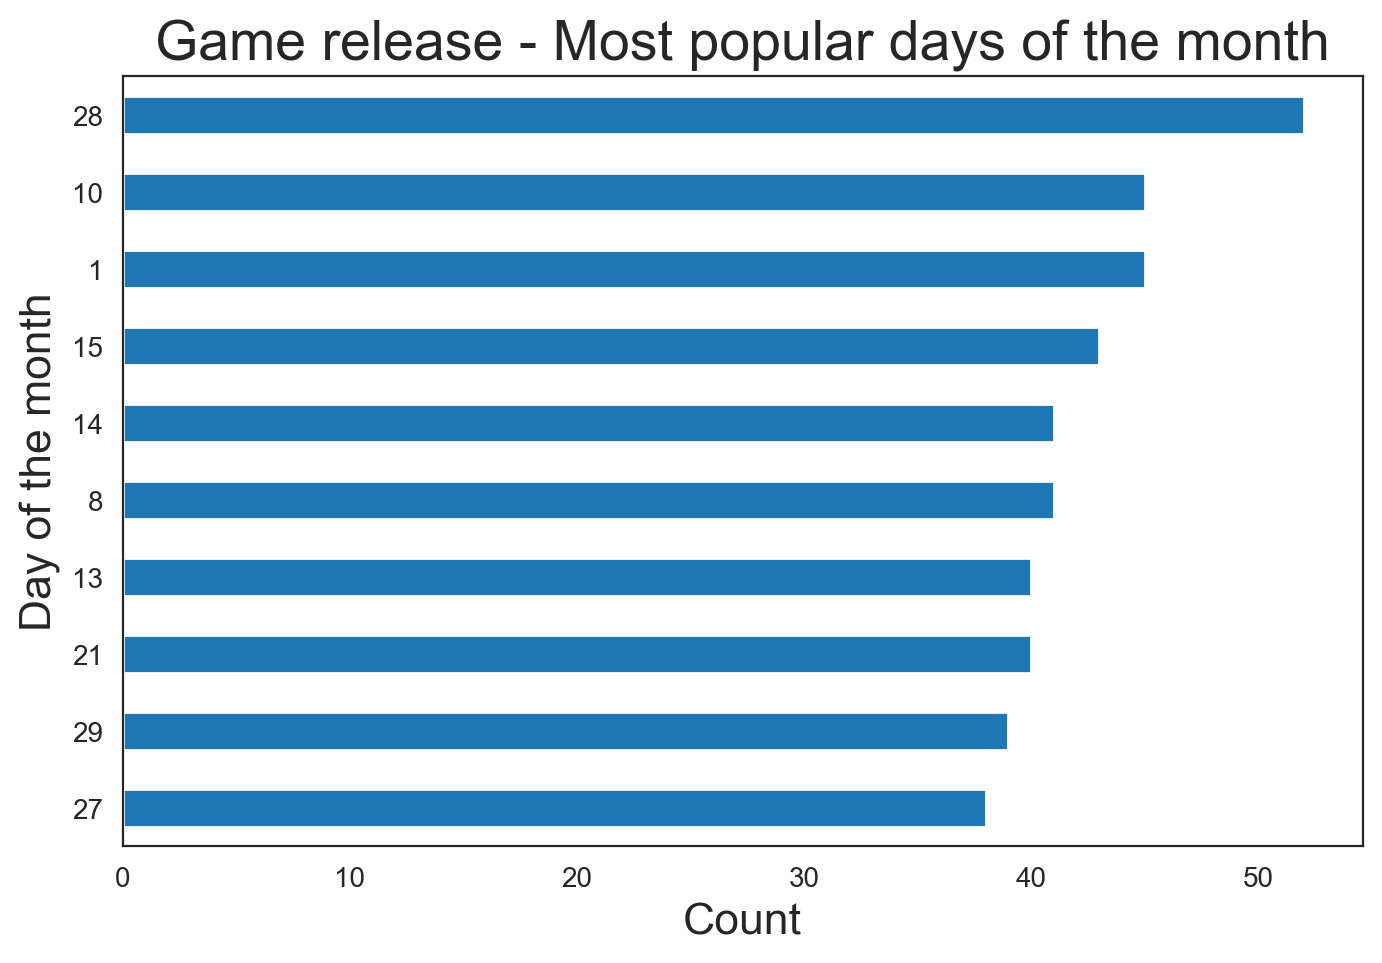

In [60]:
plt.figure(figsize=(8, 5), dpi=200)
df_games["Day"].value_counts(ascending=False).nlargest(10).sort_values().plot(kind="barh")
plt.title("Game release - Most popular days of the month", size=20)
plt.xlabel("Count", size=16)
plt.ylabel("Day of the month", size=16)
plt.show()

## 4. What are the most popular/used platforms?

Let's start by using the method before, i.e. `value_counts`:

In [61]:
df_games["Platform(s)"].value_counts()

NS                                184
Win                               125
Win, NS, PS4, PS5, XBO, XSX        64
Win, PS4, PS5, XBO, XSX            48
PS4, PS5                           35
                                 ... 
EU: NS, PS4, PS5WW: Win             1
Win, NS, PS4, XBO, XSX, Stadia      1
Win, PS4, iOS, Droid                1
Win, Mac, NS                        1
iOS,                                1
Name: Platform(s), Length: 102, dtype: int64

The column `Platforms(s)` contains multiple values per record (this makes sense as a game can be created for multiple platforms).

We need to clean it up before showing the results.

Let's make a function that will do this for us.

In [85]:
# Import the Counter Collection
from collections import Counter

def get_count_from_column(df: pd.DataFrame, column_name: str) -> pd.Series:
    # Make the needed list for the results
    result = []

    # Create a list with all the values possible
    for row in df[column_name]:
        result.append(row)

    # Strip the commas and add each individual word as an independent item in the list
    result_total = [i.strip() for word in result for i in word.split(",")]

    # Get the total count a value is repeated
    result_counts = Counter(result_total)

    # Get the unique elements and their counts into a dataframe
    platforms = pd.DataFrame.from_dict(result_counts, orient='index', columns=['count']).reset_index()
    platforms.columns = ['letter','count']

    # return the DataFrame
    return platforms.sort_values('count', ascending=False).reset_index(drop=True)


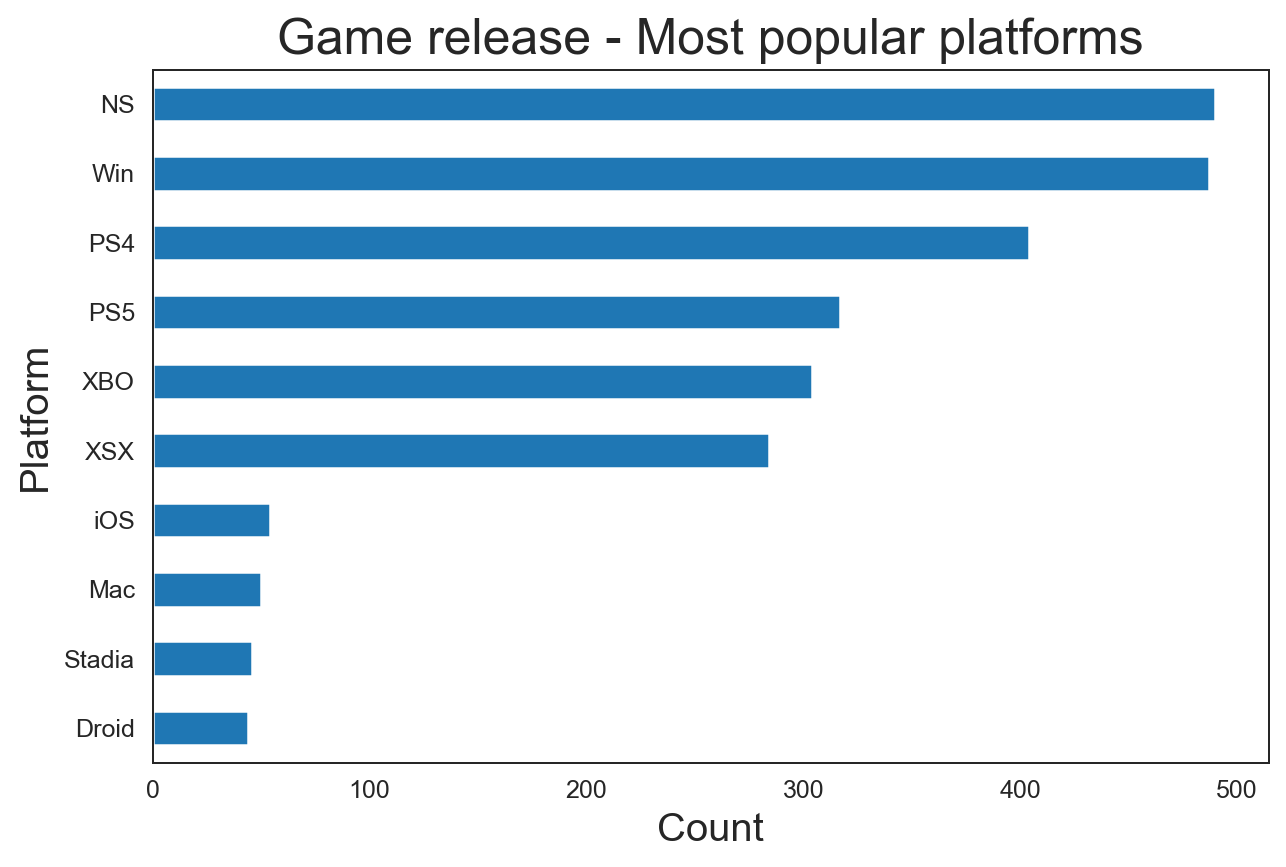

In [83]:
plt.figure(figsize=(8, 5), dpi=180)
get_count_from_column(df_games, "Platform(s)").set_index("letter")["count"].nlargest(10).sort_values().plot(kind="barh")
plt.title("Game release - Most popular platforms", size=20)
plt.xlabel("Count", size=16)
plt.ylabel("Platform", size=16)
plt.show()

The most popular platform out there is Nintendo Switch... funny if you ask me. Followed by Windows and PS4. PS5 needs to catch up!

## 5. What are the common Genre(s) of the released games?

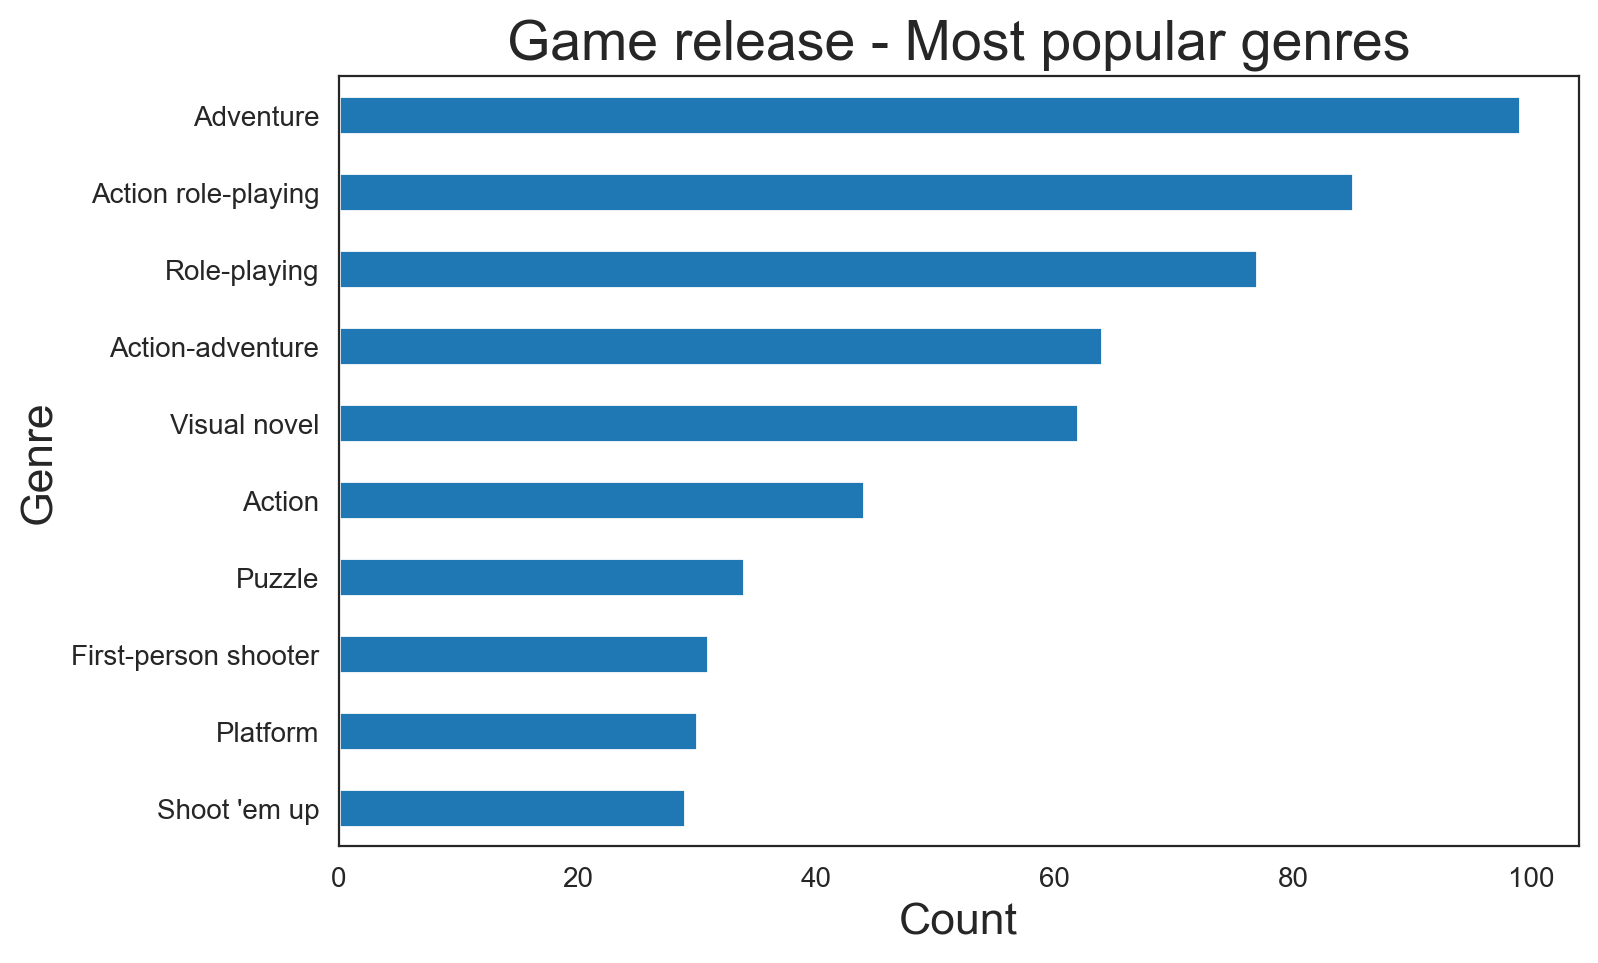

In [84]:
plt.figure(figsize=(8, 5), dpi=200)
get_count_from_column(df_games, "Genre(s)").set_index("letter")["count"].nlargest(10).sort_values().plot(kind="barh")
plt.title("Game release - Most popular genres", size=20)
plt.xlabel("Count", size=16)
plt.ylabel("Genre", size=16)
plt.show()

The most common `Genere(s)` for the games are `Adventure`, followed by `Action role-playing` and `Role-Playing`.

## 6. Who are the TOP 10 devlopers of these games (made in 2022)?

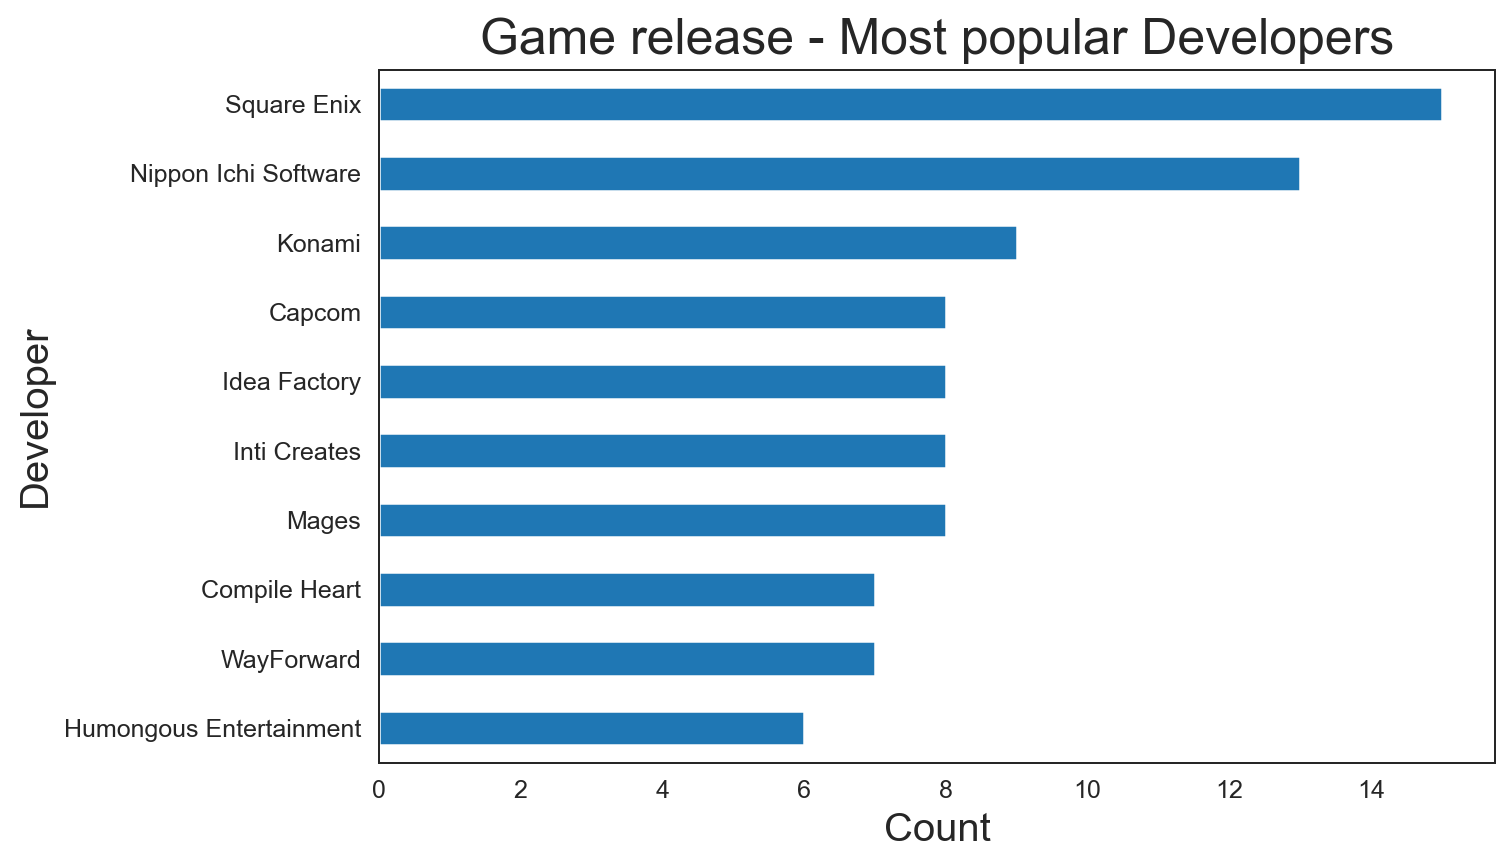

In [87]:
plt.figure(figsize=(8, 5), dpi=180)
get_count_from_column(df_games, "Developer(s)").set_index("letter")["count"].nlargest(10).sort_values().plot(kind="barh")
plt.title("Game release - Most popular Developers", size=20)
plt.xlabel("Count", size=16)
plt.ylabel("Developer", size=16)
plt.show()

`Square Enix` takes the lead, succeeded by `Nippon Ichi Software`.

Game Glossary:

1. **Square Enix**: **Square Enix** is a Japanese video game development and publishing company. The company was formed in 2003 as a result of the merger between Square Co., Ltd. and Enix Corporation. **Square Enix** is best known for its role-playing video game franchises, including the Final Fantasy series and the Dragon Quest series. The company also publishes and develops games in other genres such as action, fighting, and tactical role-playing games. Square Enix has published and developed popular franchises such as `Kingdom Hearts`, `Chrono Trigger` and the `Mana series`. 

2. **Nippon Ichi Software**: **Nippon Ichi Software, Inc**. is a Japanese video game developer and publisher based in Gifu, Japan. The company was founded in 1991 and is known for developing and publishing a wide range of video games, including strategy RPGs, tactical RPGs, and adventure games. **Nippon Ichi Software** is known for its Disgaea series of strategy RPGs, which features a unique battle system and a strong emphasis on character customization. The company also published and developed other popular games such as `Phantom Brave`, `Makai Kingdom`, and `Z.H.P`. `Unlosing Ranger VS Darkdeath Evilman`. In addition to video games, **Nippon Ichi Software** also produces and publishes anime, manga and light novels. The company is also involved in the production of mobile games, as well as porting their games on consoles.

## 6. Most popular Publishers of the games released in 2022

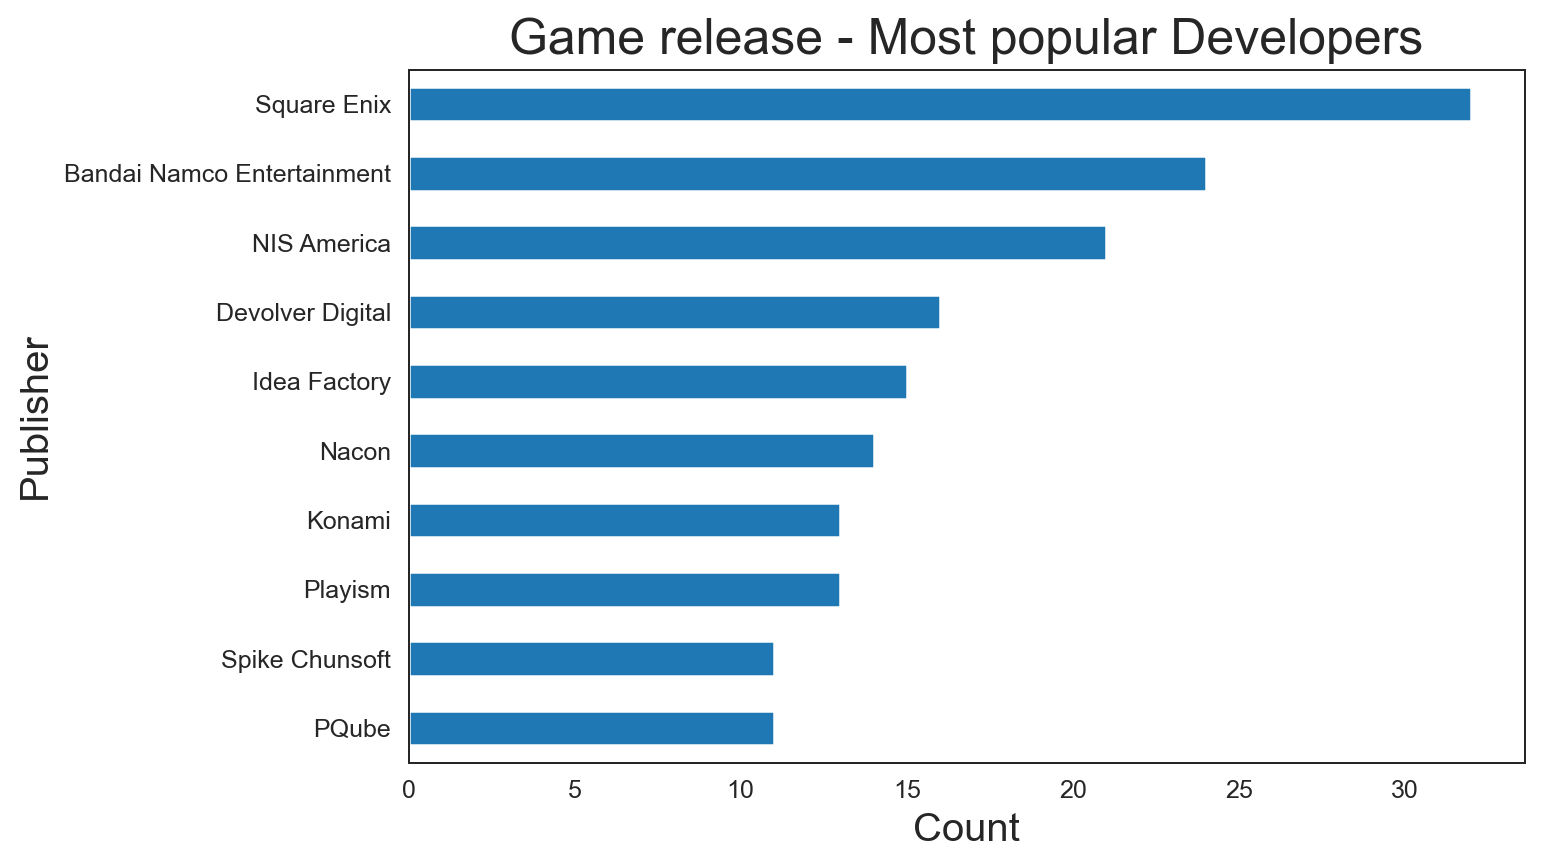

In [88]:
plt.figure(figsize=(8, 5), dpi=180)
get_count_from_column(df_games, "Publisher(s)").set_index("letter")["count"].nlargest(10).sort_values().plot(kind="barh")
plt.title("Game release - Most popular Developers", size=20)
plt.xlabel("Count", size=16)
plt.ylabel("Publisher", size=16)
plt.show()

Seems like `Square Enix` wins again as a publisher as well, succeeded by `Bandi Namco Entertainment` and `NIS America`.

Gamish Glossary:

1. **Square Enix:** **Square Enix** is a Japanese video game development and publishing company. The company was formed in 2003 as a result of the merger between Square Co., Ltd. and Enix Corporation. **Square Enix** is best known for its role-playing video game franchises, including the Final Fantasy series and the Dragon Quest series. The company also publishes and develops games in other genres such as action, fighting, and tactical role-playing games. Square Enix has published and developed popular franchises such as `Kingdom Hearts`, `Chrono Trigger` and the `Mana series`. 

2. **Bandi Namco Entertainment:** **BANDAI NAMCO Entertainment Inc.** is a Japanese video game developer and publisher. They are known for creating and publishing a wide variety of games across multiple platforms, including consoles, mobile devices, and PC. Some of their most popular franchises include `Pac-Man`, `Tekken`, `Soulcalibur`, and `Ace Combat`. They also have a strong presence in the mobile gaming market with titles like `Dragon Ball Z Dokkan Battle` and `One Piece Treasure Cruise.` **BANDAI NAMCO Entertainment** also publishes games from other developers and partners with companies such as Nintendo, Microsoft, and Sony to bring their games to a wider audience. They are one of the **LARGEST** video game publishers in Japan and have offices around the world.

3. **NIS America:** **NIS America** is a video game publisher and localization company based in California, a subsidiary of **Nippon Ichi Software**. They specialize in bringing Japanese games to the western market, and are known for publishing niche titles and games such as tactical RPG's, visual novels, and other types of games. They also publish anime and manga in the US and have a division that focuses on publishing and localizing games in the PAL region (`The PAL region is a television publication territory that covers most of Europe and Africa, alongside parts of Asia, South America and Oceania`). Their mission is to bring the best of Japanese entertainment to the Western market and they are known for their high-quality localization. Some of their popular titles include `Disgaea`, `Danganronpa`, and `The Legend of Heroes`.




Well **Japan** seems to be dominating the gaming industry for sure, atleast that is what happened in 2022! Let's see if they maintain their position in 2023, or maybe **Meta's**, `MetaVerse` might dystroy it (highly doubt it).

# In Depth Analysis, and Finding Trends within the Data

We've previously seen that games can be released for multiple Platforms. In order to make the analysis easier to perform, we will created 5 additional columns storing information whether the game was released on 5 most popular platforms, i.e.: `NS`, `Win`, `PS4`, `PS5`, `XBO`.

Games can also belong to multiple genres. We will only keep the leading genre, to unify the data.

In [111]:
def add_platform(df: pd.DataFrame, platform: str) -> pd.DataFrame:
    df[platform] = df["Platform(s)"].apply(lambda x: int(platform in x))
    return df

def add_leading_genre(df: pd.DataFrame) -> pd.DataFrame:
    df["leading_genre"] = df["Genre(s)"].apply(lambda x: x.split(",")[0])
    return df

In [112]:
popular_platforms = ["NS", "Win", "PS4", "PS5", "XBO"]
for current_platform in popular_platforms:
    df_games = add_platform(df_games, current_platform)

df_games = add_leading_genre(df_games)

Let's see if the columns were added:

In [113]:
df_games.head()

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s),NS,WIN,PS4,PS5,XBO,leading_genre,Win
0,JANUARY,3,Freddi Fish 3: The Case of the Stolen Conch Shell,NS,Adventure,Humongous Entertainment,UFO Interactive Games,1,0,0,0,0,Adventure,0
1,JANUARY,3,Putt-Putt Travels Through Time,NS,Adventure,Humongous Entertainment,UFO Interactive Games,1,0,0,0,0,Adventure,0
2,JANUARY,4,Deep Rock Galactic,"PS4, PS5",First-person shooter,Ghost Ship Games,Coffee Stain Publishing,0,0,1,1,0,First-person shooter,0
3,JANUARY,4,The Pedestrian,"XBO, XSX","Puzzle, platform",Skookum Arts LLC,Skookum Arts LLC,0,0,0,0,1,Puzzle,0
4,JANUARY,6,Demon Gaze Extra,"NS, PS4",Role-playing,Cattle Call,Clouded Leopard Entertainment,1,0,1,0,0,Role-playing,0


## 1. Most popular genres per platform
It may be interesting to see what genres are the most popular on each platform. Are there any differences?

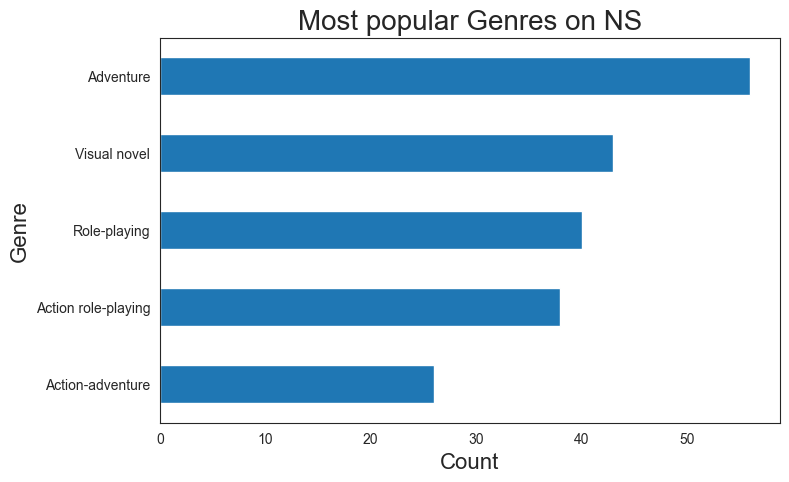

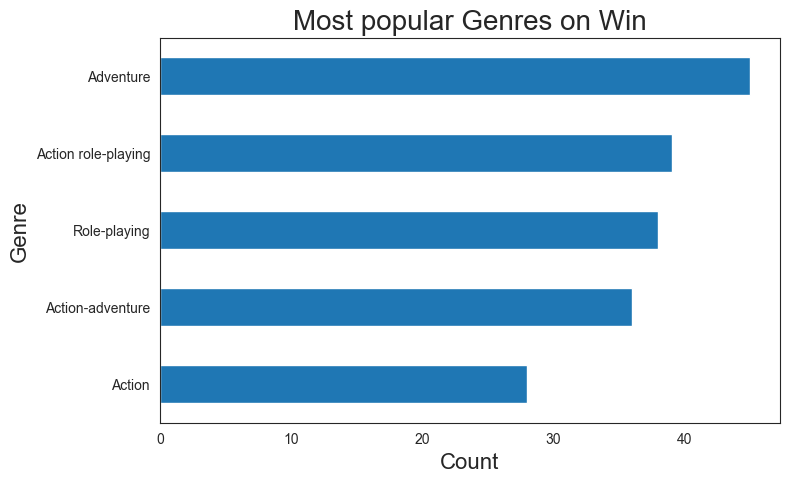

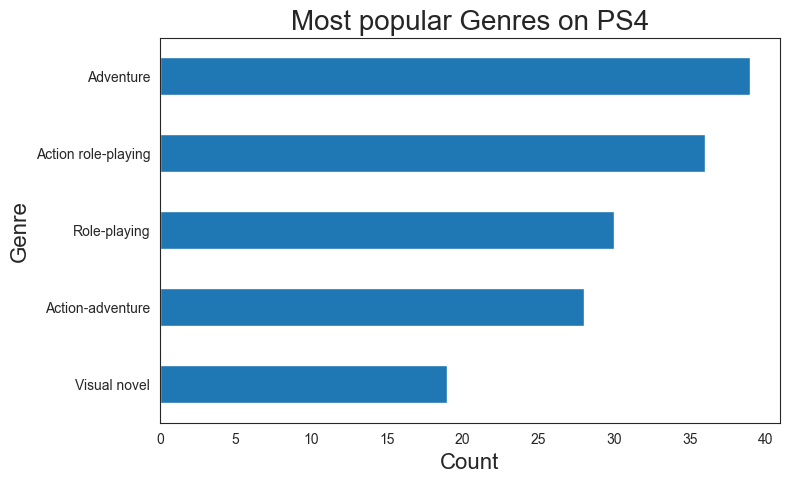

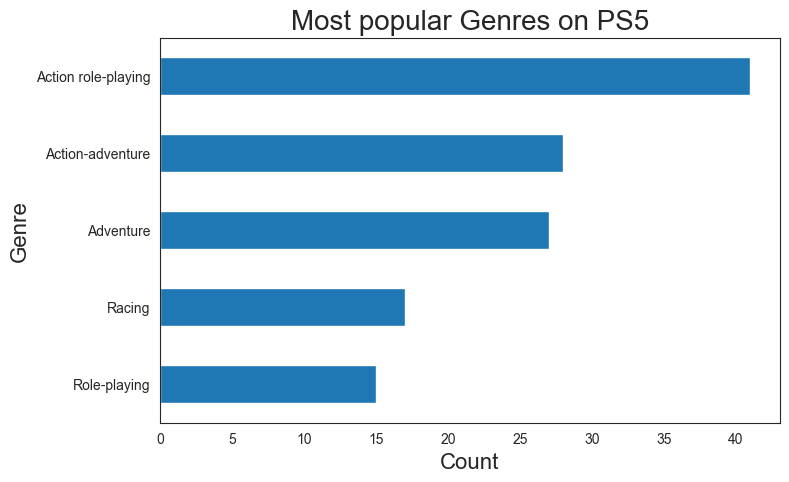

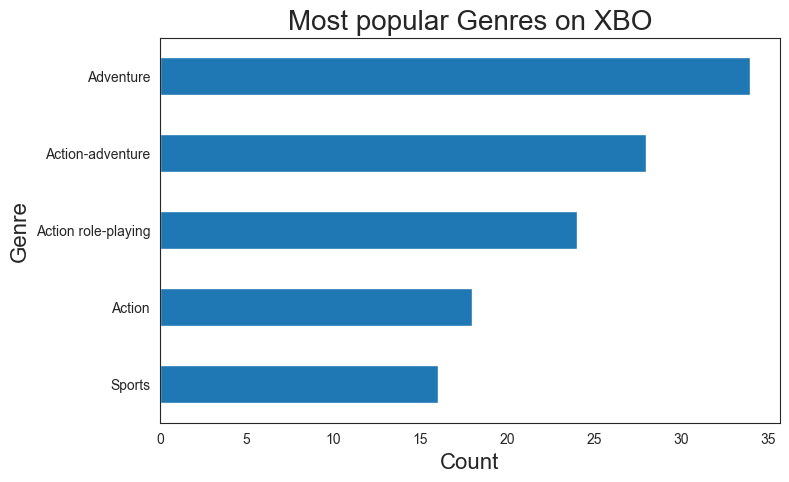

In [132]:
df_popularity = df_games.groupby("leading_genre")[popular_platforms].sum()

for platform in popular_platforms:
    df_platform = df_popularity[platform].sort_values(ascending=False).head(5)
    plt.figure(figsize=(8, 5), dpi=100)
    df_platform.sort_values().plot.barh()
    plt.title(f"Most popular Genres on {platform}", size=20)
    plt.xlabel("Count", size=16)
    plt.ylabel("Genre", size=16)
    plt.show()

Key takeaways:
- Adventure games are the most popular on all platforms except PS5;
- PS5 has the most Action role-playing games (over 40);
- Visual novels are very popular on NS.

## 2. Heatmap of the most popular platforms vs genres

Now let's examine the heatmap of the 10 most popular genres vs 5 most popular platforms.

In [140]:
most_popular_genres = get_count_from_column(df_games, "Genre(s)").set_index("letter")["count"].nlargest(10).index.to_list()

In [144]:
df_popular_genres = df_games[df_games["leading_genre"].isin(most_popular_genres)]

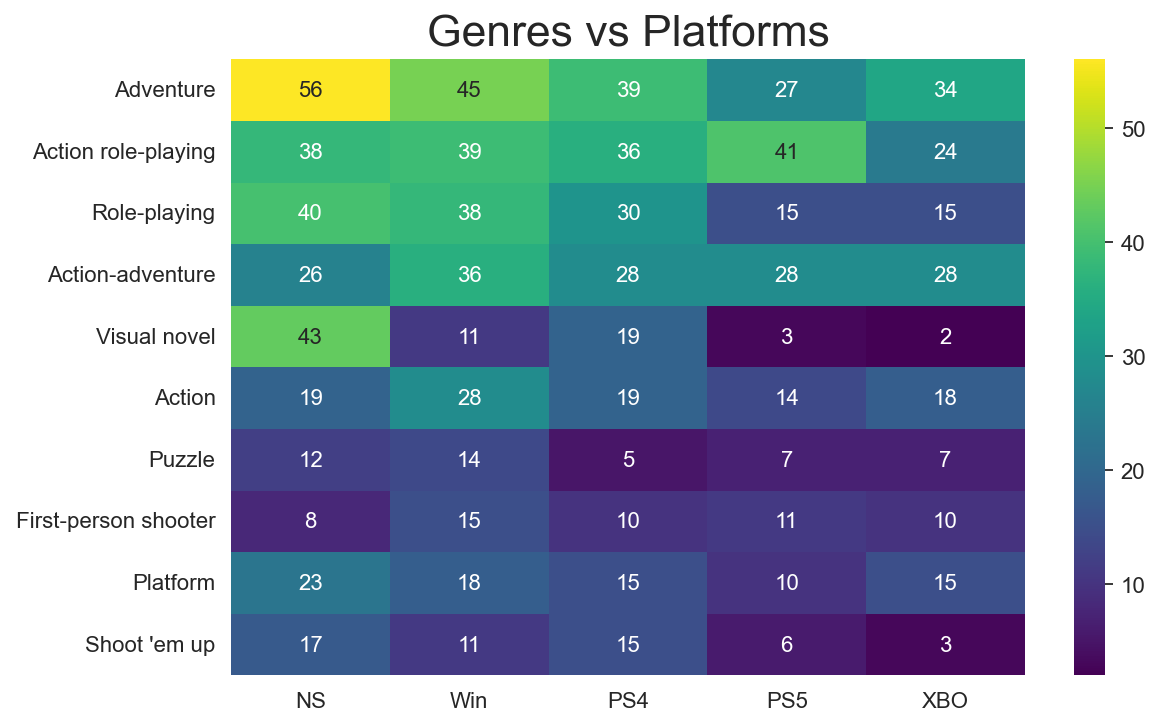

In [161]:
plt.figure(figsize=(8, 5), dpi=160)
sns.heatmap(df_popular_genres.groupby("leading_genre")[popular_platforms].sum().reindex(most_popular_genres), cmap="viridis", annot=True)
plt.title(f"Genres vs Platforms", size=20)
plt.xlabel("")
plt.ylabel("")
plt.show()

Key takeaways:
- Once again, we can see that `Visual novel` genre is significantly more popular on NS than on other platforms (only 3 games on PS5 and 2 games on XBO).
- Adventure and Action role-playing games are popular on every platform.